In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(150,330)]
i =0
result = np.zeros((2160))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.TAUY.nc')
        TAUY = data.variables['TAUY'][0,200:600,550:1500]
        TAUY[TAUY == -1.0] = np.nan
        latt = data.variables['ULAT'][200:600,550:1500]
        #result[i] = latt[TAUY[:,:] == np.nanmax(TAUY[:,:])].max()
        result[i] = TAUY[TAUY[:,:] == np.nanmax(TAUY[:,:])].max()
        i=i+1

In [4]:
ww2 = np.convolve(result, np.ones((60,))/60, mode='valid')

In [5]:
ww2.shape

(2101,)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


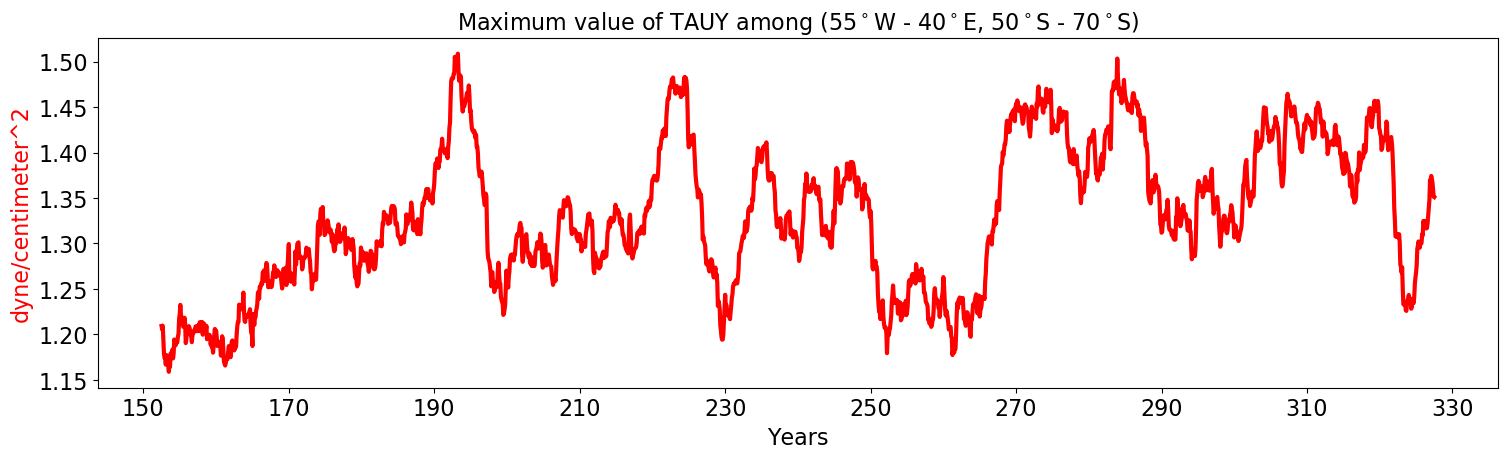

In [6]:
t=np.arange(30,2131,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(t,ww2,'red',linewidth=3)
#ax0.plot(0.0001*result,'red',linewidth=3)
#########################################
plt.xticks(range(0,2161,240), ['150', '170', '190', '210','230','250','270','290','310','330'],**my_font)
#plt.hlines(0, 0, 1200, colors = "blue",linestyles = "dashed")
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('dyne/centimeter^2',color= 'red',**my_font)
plt.axis("tight")
ax0.set_title('Maximum value of TAUY among (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S)',**my_font)


plt.savefig("wq2.png",bbox_inches='tight',dpi=fig.dpi)